In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# 데이터 로딩

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/galaxy.csv")
data.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,NaN,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,NaN,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,NaN,Space Gray,Galaxy_S8,contains description,0,0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               316 non-null    object 
 3   color                 892 non-null    object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [4]:
data.describe()

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,0.449158,216.844162,31.184512,2.863300,0.461953
std,0.497576,172.893308,41.744518,9.418585,0.498718
min,0.000000,0.010000,0.000000,0.000000,0.000000
25%,0.000000,80.000000,0.000000,0.000000,0.000000
50%,0.000000,198.000000,0.000000,0.000000,0.000000
75%,1.000000,310.000000,79.000000,2.000000,1.000000
max,1.000000,999.000000,111.000000,81.000000,1.000000


# 전처리

In [5]:
# 결측값 
data.isna().sum()

BuyItNow                   0
startprice                 0
carrier                 1169
color                    593
productline                0
noDescription              0
charCountDescription       0
upperCaseDescription       0
sold                       0
dtype: int64

In [6]:
data.isna().sum() / len(data) * 100

BuyItNow                 0.000000
startprice               0.000000
carrier                 78.720539
color                   39.932660
productline              0.000000
noDescription            0.000000
charCountDescription     0.000000
upperCaseDescription     0.000000
sold                     0.000000
dtype: float64

In [4]:
data[data['carrier'].isna() == True]

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,NaN,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,NaN,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
4,1,100.00,NaN,Space Gray,Galaxy_S8,contains description,0,0,1
5,1,0.99,NaN,White,Galaxy_S7,contains description,0,0,1
...,...,...,...,...,...,...,...,...,...
1478,0,319.00,NaN,White,Unknown,contains description,0,0,0
1479,0,424.99,NaN,White,Galaxy_Note10,no description,99,5,1
1481,0,239.95,NaN,Midnight Black,Galaxy_S9,no description,97,5,1
1482,0,329.99,NaN,Space Gray,Galaxy_Note10,no description,93,1,0


In [8]:
data[data['color'].isna() == True]

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
1,0,235.00,NaN,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
21,0,84.99,AT&T,NaN,Galaxy_S7,no description,16,15,1
22,0,249.99,NaN,NaN,Galaxy_S9,no description,101,2,0
25,0,185.00,NaN,NaN,Galaxy_Note8,no description,96,2,1
...,...,...,...,...,...,...,...,...,...
1467,0,87.00,NaN,NaN,Unknown,contains description,0,0,0
1471,0,329.99,NaN,NaN,Galaxy_Note9,contains description,0,0,0
1472,0,36.95,NaN,NaN,Galaxy_S7,no description,70,10,0
1477,0,279.00,NaN,NaN,Unknown,contains description,0,0,0


### carrier 결측값 컬럼

In [5]:
na_index = data[data['carrier'].isna() == True].index

In [6]:
na_index

Index([   0,    1,    2,    4,    5,    6,    7,    8,   10,   11,
       ...
       1473, 1474, 1475, 1476, 1477, 1478, 1479, 1481, 1482, 1483],
      dtype='int64', length=1169)

In [7]:
data.iloc[na_index]

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,NaN,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,NaN,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
4,1,100.00,NaN,Space Gray,Galaxy_S8,contains description,0,0,1
5,1,0.99,NaN,White,Galaxy_S7,contains description,0,0,1
...,...,...,...,...,...,...,...,...,...
1478,0,319.00,NaN,White,Unknown,contains description,0,0,0
1479,0,424.99,NaN,White,Galaxy_Note10,no description,99,5,1
1481,0,239.95,NaN,Midnight Black,Galaxy_S9,no description,97,5,1
1482,0,329.99,NaN,Space Gray,Galaxy_Note10,no description,93,1,0


### color 결측값 컬럼

In [8]:
na_index2 = data[data['color'].isna() == True].index

In [9]:
na_index2

Index([   1,    2,   21,   22,   25,   26,   27,   29,   30,   31,
       ...
       1455, 1456, 1459, 1464, 1465, 1467, 1471, 1472, 1477, 1480],
      dtype='int64', length=593)

In [10]:
data.iloc[na_index2]

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
1,0,235.00,NaN,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
21,0,84.99,AT&T,NaN,Galaxy_S7,no description,16,15,1
22,0,249.99,NaN,NaN,Galaxy_S9,no description,101,2,0
25,0,185.00,NaN,NaN,Galaxy_Note8,no description,96,2,1
...,...,...,...,...,...,...,...,...,...
1467,0,87.00,NaN,NaN,Unknown,contains description,0,0,0
1471,0,329.99,NaN,NaN,Galaxy_Note9,contains description,0,0,0
1472,0,36.95,NaN,NaN,Galaxy_S7,no description,70,10,0
1477,0,279.00,NaN,NaN,Unknown,contains description,0,0,0


## 통신사는 판매에 큰 영향을 미치지 않는 것으로 판단되고 너무 많은 결측이 있어 삭제 예정
### carrier 결측 비율 : 78.720539 => 삭제

In [11]:
data_delca = data.copy()

In [12]:
data_delca = data_delca.drop('carrier', axis=1)

In [13]:
data_delca.head()

,BuyItNow,startprice,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,Unknown,no description,100,2,0
3,1,175.00,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,Space Gray,Galaxy_S8,contains description,0,0,1


In [14]:
data_delca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   color                 892 non-null    object 
 3   productline           1485 non-null   object 
 4   noDescription         1485 non-null   object 
 5   charCountDescription  1485 non-null   int64  
 6   upperCaseDescription  1485 non-null   int64  
 7   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 92.9+ KB


In [15]:
data_delca['color'].value_counts()

color
White             328
Midnight Black    274
Space Gray        180
Gold               52
Black              38
Aura Black         19
Prism Black         1
Name: count, dtype: int64

In [16]:
data_delca.isna().sum()

BuyItNow                  0
startprice                0
color                   593
productline               0
noDescription             0
charCountDescription      0
upperCaseDescription      0
sold                      0
dtype: int64

In [17]:
data_delca['color'] = data_delca['color'].fillna('colorlessness')

In [18]:
data_delca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   color                 1485 non-null   object 
 3   productline           1485 non-null   object 
 4   noDescription         1485 non-null   object 
 5   charCountDescription  1485 non-null   int64  
 6   upperCaseDescription  1485 non-null   int64  
 7   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 92.9+ KB


# Feature Engineering

### 문자형 컬럼 => 정수형으로 바꾸기

In [23]:
data_delca['color'].value_counts()

color
colorlessness     593
White             328
Midnight Black    274
Space Gray        180
Gold               52
Black              38
Aura Black         19
Prism Black         1
Name: count, dtype: int64

In [24]:
data_delca['productline'].value_counts()

productline
Galaxy_Note10    351
Galaxy_S8        277
Galaxy_S7        227
Unknown          204
Galaxy_S9        158
Galaxy_Note8     153
Galaxy_Note9     107
Galaxy_S10         8
Name: count, dtype: int64

In [25]:
data_delca['noDescription'].value_counts()

noDescription
contains description    856
no description          629
Name: count, dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
data_delca['color'] =le.fit_transform(data_delca['color'])
data_delca['productline'] =le2.fit_transform(data_delca['productline'])
data_delca['noDescription'] =le3.fit_transform(data_delca['noDescription'])

In [25]:
print(data_delca['color'])
print(type(data_delca['color']))
print()
print(data_delca['productline'])
print(type(data_delca['productline']))
print()
print(data_delca['noDescription'])
print(type(data_delca['noDescription']))

0       6
1       7
2       7
3       5
4       5
       ..
1480    7
1481    3
1482    5
1483    3
1484    3
Name: color, Length: 1485, dtype: int64
<class 'pandas.core.series.Series'>

0       6
1       2
2       7
3       2
4       5
       ..
1480    4
1481    6
1482    0
1483    4
1484    4
Name: productline, Length: 1485, dtype: int64
<class 'pandas.core.series.Series'>

0       0
1       0
2       1
3       0
4       0
       ..
1480    1
1481    1
1482    1
1483    1
1484    1
Name: noDescription, Length: 1485, dtype: int64
<class 'pandas.core.series.Series'>


In [26]:
data_delca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   color                 1485 non-null   int64  
 3   productline           1485 non-null   int64  
 4   noDescription         1485 non-null   int64  
 5   charCountDescription  1485 non-null   int64  
 6   upperCaseDescription  1485 non-null   int64  
 7   sold                  1485 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 92.9 KB


In [27]:
le.inverse_transform(data_delca['color'])

array([6, 7, 7, ..., 5, 3, 3])

In [28]:
le2.inverse_transform(data_delca['productline'])

array([6, 2, 7, ..., 0, 4, 4])

In [29]:
le3.inverse_transform(data_delca['noDescription'])

array([0, 0, 1, ..., 1, 1, 1])

# 데이터 분리 및 분석

In [30]:
data_delca.columns

Index(['BuyItNow', 'startprice', 'color', 'productline', 'noDescription',
       'charCountDescription', 'upperCaseDescription', 'sold'],
      dtype='object')

In [31]:
data_corr = data_delca[['BuyItNow', 'startprice','charCountDescription', 'upperCaseDescription', 'sold']]

<Axes: >

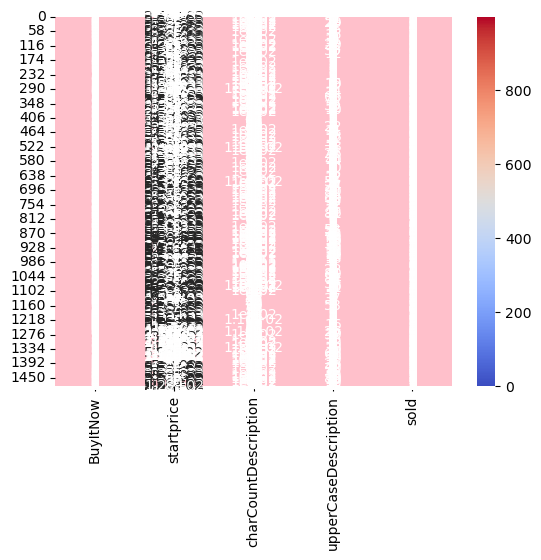

In [32]:
# ??
sns.heatmap(data_corr, cmap='coolwarm', annot=True, linecolor='pink', linewidth=3)

In [33]:
data_delca.head()

,BuyItNow,startprice,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,6,6,0,0,0,1
1,0,235.00,7,2,0,0,0,0
2,0,199.99,7,7,1,100,2,0
3,1,175.00,5,2,0,0,0,1
4,1,100.00,5,5,0,0,0,1


In [34]:
data_delca.corr()

,BuyItNow,startprice,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
BuyItNow,1.000000,-0.456724,-0.032343,0.015537,-0.069922,-0.092170,-0.018091,0.540054
startprice,-0.456724,1.000000,-0.024672,-0.363264,-0.105587,-0.079081,-0.036946,-0.443617
color,-0.032343,-0.024672,1.000000,0.085937,0.054198,0.040813,-0.017929,-0.023692
productline,0.015537,-0.363264,0.085937,1.000000,0.028727,0.029529,0.043333,-0.012440
noDescription,-0.069922,-0.105587,0.054198,0.028727,1.000000,0.871761,0.354764,-0.048024
charCountDescription,-0.092170,-0.079081,0.040813,0.029529,0.871761,1.000000,0.394730,-0.073461
upperCaseDescription,-0.018091,-0.036946,-0.017929,0.043333,0.354764,0.394730,1.000000,-0.058993
sold,0.540054,-0.443617,-0.023692,-0.012440,-0.048024,-0.073461,-0.058993,1.000000


In [37]:
data_delca.head()

,BuyItNow,startprice,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,6,6,0,0,0,1
1,0,235.00,7,2,0,0,0,0
2,0,199.99,7,7,1,100,2,0
3,1,175.00,5,2,0,0,0,1
4,1,100.00,5,5,0,0,0,1


<Axes: xlabel='BuyItNow'>

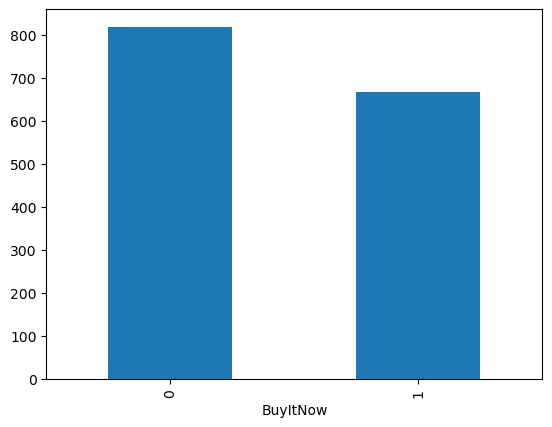

In [40]:
data_delca['BuyItNow'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

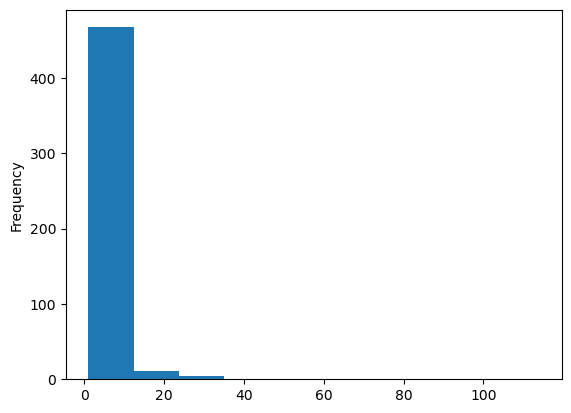

In [43]:
data_delca['startprice'].value_counts().plot(kind='hist')

<Axes: xlabel='BuyItNow'>

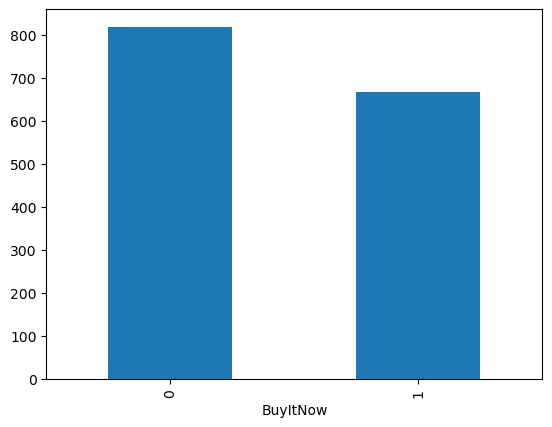

In [44]:
data_delca['BuyItNow'].value_counts().plot(kind='bar')

<Axes: xlabel='color'>

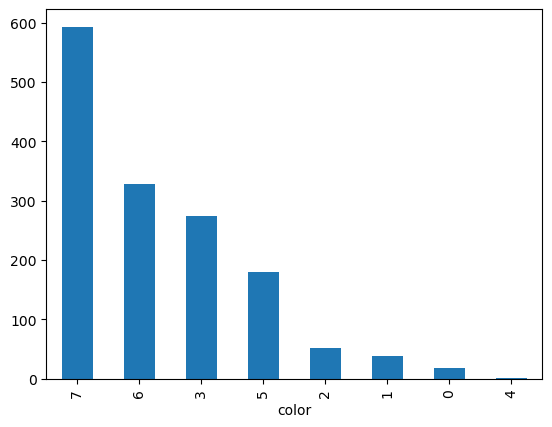

In [45]:
data_delca['color'].value_counts().plot(kind='bar')

<Axes: xlabel='productline'>

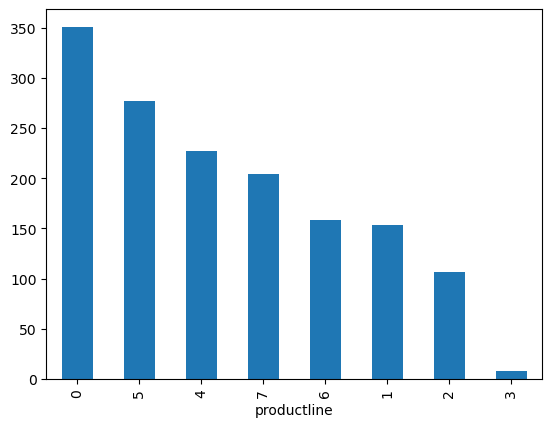

In [46]:
data_delca['productline'].value_counts().plot(kind='bar')

<Axes: xlabel='noDescription'>

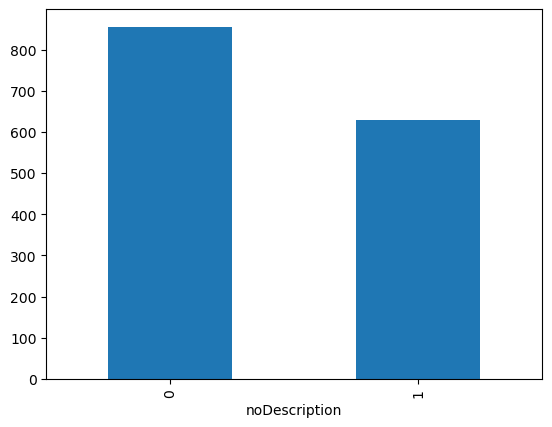

In [47]:
data_delca['noDescription'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

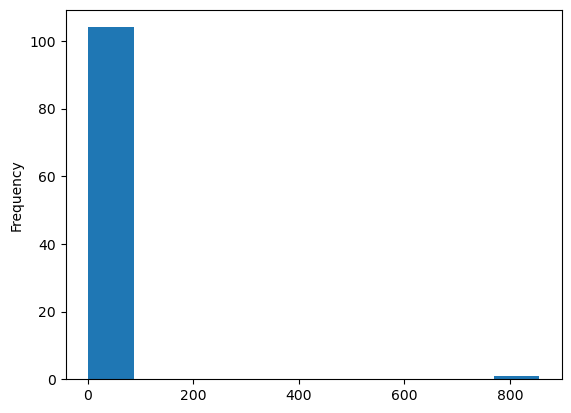

In [49]:
data_delca['charCountDescription'].value_counts().plot(kind='hist')

<Axes: ylabel='Frequency'>

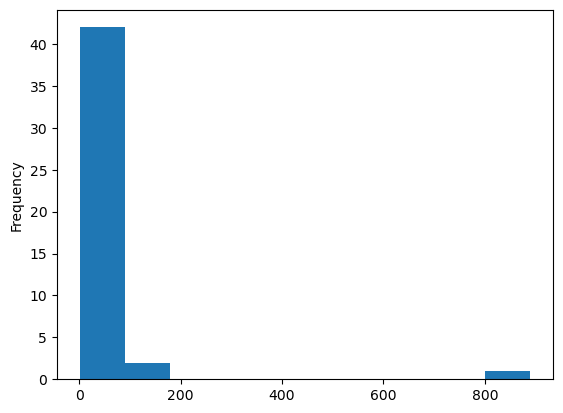

In [51]:
data_delca['upperCaseDescription'].value_counts().plot(kind='hist')

<Axes: xlabel='sold'>

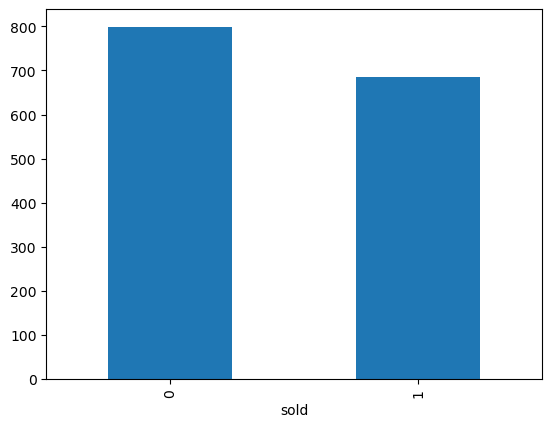

In [41]:
data_delca['sold'].value_counts().plot(kind='bar')

# 성능 평가 및 성능 개선을 위한 튜닝

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [68]:
X = data_delca.drop('BuyItNow', axis=1)
y = data_delca['BuyItNow']

In [69]:
X

,startprice,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,199.99,6,6,0,0,0,1
1,235.00,7,2,0,0,0,0
2,199.99,7,7,1,100,2,0
3,175.00,5,2,0,0,0,1
4,100.00,5,5,0,0,0,1
...,...,...,...,...,...,...,...
1480,89.50,7,4,1,96,2,0
1481,239.95,3,6,1,97,5,1
1482,329.99,5,0,1,93,1,0
1483,89.00,3,4,1,92,2,1


In [70]:
y

0       0
1       0
2       0
3       1
4       1
       ..
1480    0
1481    0
1482    0
1483    0
1484    0
Name: BuyItNow, Length: 1485, dtype: int64

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 8)

In [72]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.7623318385650224
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       239
           1       0.75      0.72      0.74       207

    accuracy                           0.76       446
   macro avg       0.76      0.76      0.76       446
weighted avg       0.76      0.76      0.76       446



### 훈련 데이터와 테스트 데이터 비율 변화로 성능 튜닝하기

In [74]:
# 2번째 b
for ts in range(1, 10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = ts/10, random_state = 8)
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    print()
    print(ts, accuracy_score(y_test, pred))
    print(ts, classification_report(y_test, pred))


1 0.7449664429530202
1               precision    recall  f1-score   support

           0       0.79      0.73      0.76        81
           1       0.70      0.76      0.73        68

    accuracy                           0.74       149
   macro avg       0.74      0.75      0.74       149
weighted avg       0.75      0.74      0.75       149


2 0.7643097643097643
2               precision    recall  f1-score   support

           0       0.76      0.78      0.77       151
           1       0.77      0.75      0.76       146

    accuracy                           0.76       297
   macro avg       0.76      0.76      0.76       297
weighted avg       0.76      0.76      0.76       297


3 0.7488789237668162
3               precision    recall  f1-score   support

           0       0.76      0.78      0.77       239
           1       0.74      0.71      0.72       207

    accuracy                           0.75       446
   macro avg       0.75      0.75      0.75       446
we

### 하이퍼파라미터 튜닝

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 8)

In [76]:
# 4번째 b
for i in range(1, 20):
    dtc = DecisionTreeClassifier(max_depth=i, random_state=8)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    print(i, accuracy_score(y_test, pred))
    print(i, classification_report(y_test, pred))

1 0.7511210762331838
1               precision    recall  f1-score   support

           0       0.78      0.74      0.76       239
           1       0.72      0.76      0.74       207

    accuracy                           0.75       446
   macro avg       0.75      0.75      0.75       446
weighted avg       0.75      0.75      0.75       446

2 0.7780269058295964
2               precision    recall  f1-score   support

           0       0.74      0.90      0.81       239
           1       0.84      0.64      0.73       207

    accuracy                           0.78       446
   macro avg       0.79      0.77      0.77       446
weighted avg       0.79      0.78      0.77       446

3 0.7825112107623319
3               precision    recall  f1-score   support

           0       0.77      0.85      0.81       239
           1       0.80      0.71      0.75       207

    accuracy                           0.78       446
   macro avg       0.79      0.78      0.78       446
weigh

### criterion : 분류 알고리즘 변경하면서 최적화

In [77]:
# 11번째 b
for i in range(1, 20):
    dtc = DecisionTreeClassifier(criterion="entropy", max_depth=i, random_state=8)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    print(i, accuracy_score(y_test, pred))
    print(i, classification_report(y_test, pred))

1 0.7511210762331838
1               precision    recall  f1-score   support

           0       0.78      0.74      0.76       239
           1       0.72      0.76      0.74       207

    accuracy                           0.75       446
   macro avg       0.75      0.75      0.75       446
weighted avg       0.75      0.75      0.75       446

2 0.7780269058295964
2               precision    recall  f1-score   support

           0       0.74      0.90      0.81       239
           1       0.84      0.64      0.73       207

    accuracy                           0.78       446
   macro avg       0.79      0.77      0.77       446
weighted avg       0.79      0.78      0.77       446

3 0.7825112107623319
3               precision    recall  f1-score   support

           0       0.77      0.85      0.81       239
           1       0.80      0.71      0.75       207

    accuracy                           0.78       446
   macro avg       0.79      0.78      0.78       446
weigh

### log_loss로 분석

In [78]:
# 11번째 b
for i in range(1, 20):
    dtc = DecisionTreeClassifier(criterion="log_loss", max_depth=i, random_state=8)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    print(i, accuracy_score(y_test, pred))
    print(i, classification_report(y_test, pred))

1 0.7511210762331838
1               precision    recall  f1-score   support

           0       0.78      0.74      0.76       239
           1       0.72      0.76      0.74       207

    accuracy                           0.75       446
   macro avg       0.75      0.75      0.75       446
weighted avg       0.75      0.75      0.75       446

2 0.7780269058295964
2               precision    recall  f1-score   support

           0       0.74      0.90      0.81       239
           1       0.84      0.64      0.73       207

    accuracy                           0.78       446
   macro avg       0.79      0.77      0.77       446
weighted avg       0.79      0.78      0.77       446

3 0.7825112107623319
3               precision    recall  f1-score   support

           0       0.77      0.85      0.81       239
           1       0.80      0.71      0.75       207

    accuracy                           0.78       446
   macro avg       0.79      0.78      0.78       446
weigh

### Log Loss: 확률 예측의 품질을 평가하고, 모델의 출력 확률을 최적화하는 데 중점을 둡니다.
### Criterion: 트리 기반 모델에서 데이터를 분할하는 기준을 조정하여 모델의 분할 방식과 결과를 개선합니다.
### 하이퍼파라미터 튜닝: 모델의 다양한 매개변수를 최적화하여 성능을 극대화하고, 과적합을 방지합니다.
### 훈련 데이터와 테스트 데이터 비율 변화: 모델이 학습하는 데이터와 평가하는 데이터의 비율을 조정하여 학습 성능과 일반화 성능을 균형 있게 유지합니다.

### 의사결정나무(DecisionTree) 시각화

In [79]:
from sklearn.tree import plot_tree

In [80]:
X_train.columns

Index(['startprice', 'color', 'productline', 'noDescription',
       'charCountDescription', 'upperCaseDescription', 'sold'],
      dtype='object')

[Text(0.5334694602272727, 0.975, 'sold <= 0.5\nlog_loss = 0.991\nsamples = 1039\nvalue = [579, 460]'),
 Text(0.3314183925953079, 0.925, 'startprice <= 249.96\nlog_loss = 0.707\nsamples = 571\nvalue = [461.0, 110.0]'),
 Text(0.4324439264112903, 0.95, 'True  '),
 Text(0.17859924853372433, 0.875, 'charCountDescription <= 98.5\nlog_loss = 0.841\nsamples = 256\nvalue = [187, 69]'),
 Text(0.0670592008797654, 0.825, 'startprice <= 249.77\nlog_loss = 0.885\nsamples = 218\nvalue = [152, 66]'),
 Text(0.06119409824046921, 0.775, 'color <= 2.0\nlog_loss = 0.881\nsamples = 217\nvalue = [152, 65]'),
 Text(0.017595307917888565, 0.725, 'startprice <= 32.5\nlog_loss = 1.0\nsamples = 12\nvalue = [6, 6]'),
 Text(0.011730205278592375, 0.675, 'log_loss = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.02346041055718475, 0.675, 'upperCaseDescription <= 3.5\nlog_loss = 0.811\nsamples = 8\nvalue = [2, 6]'),
 Text(0.017595307917888565, 0.625, 'startprice <= 144.995\nlog_loss = 0.592\nsamples = 7\nvalue = [1, 6]'),

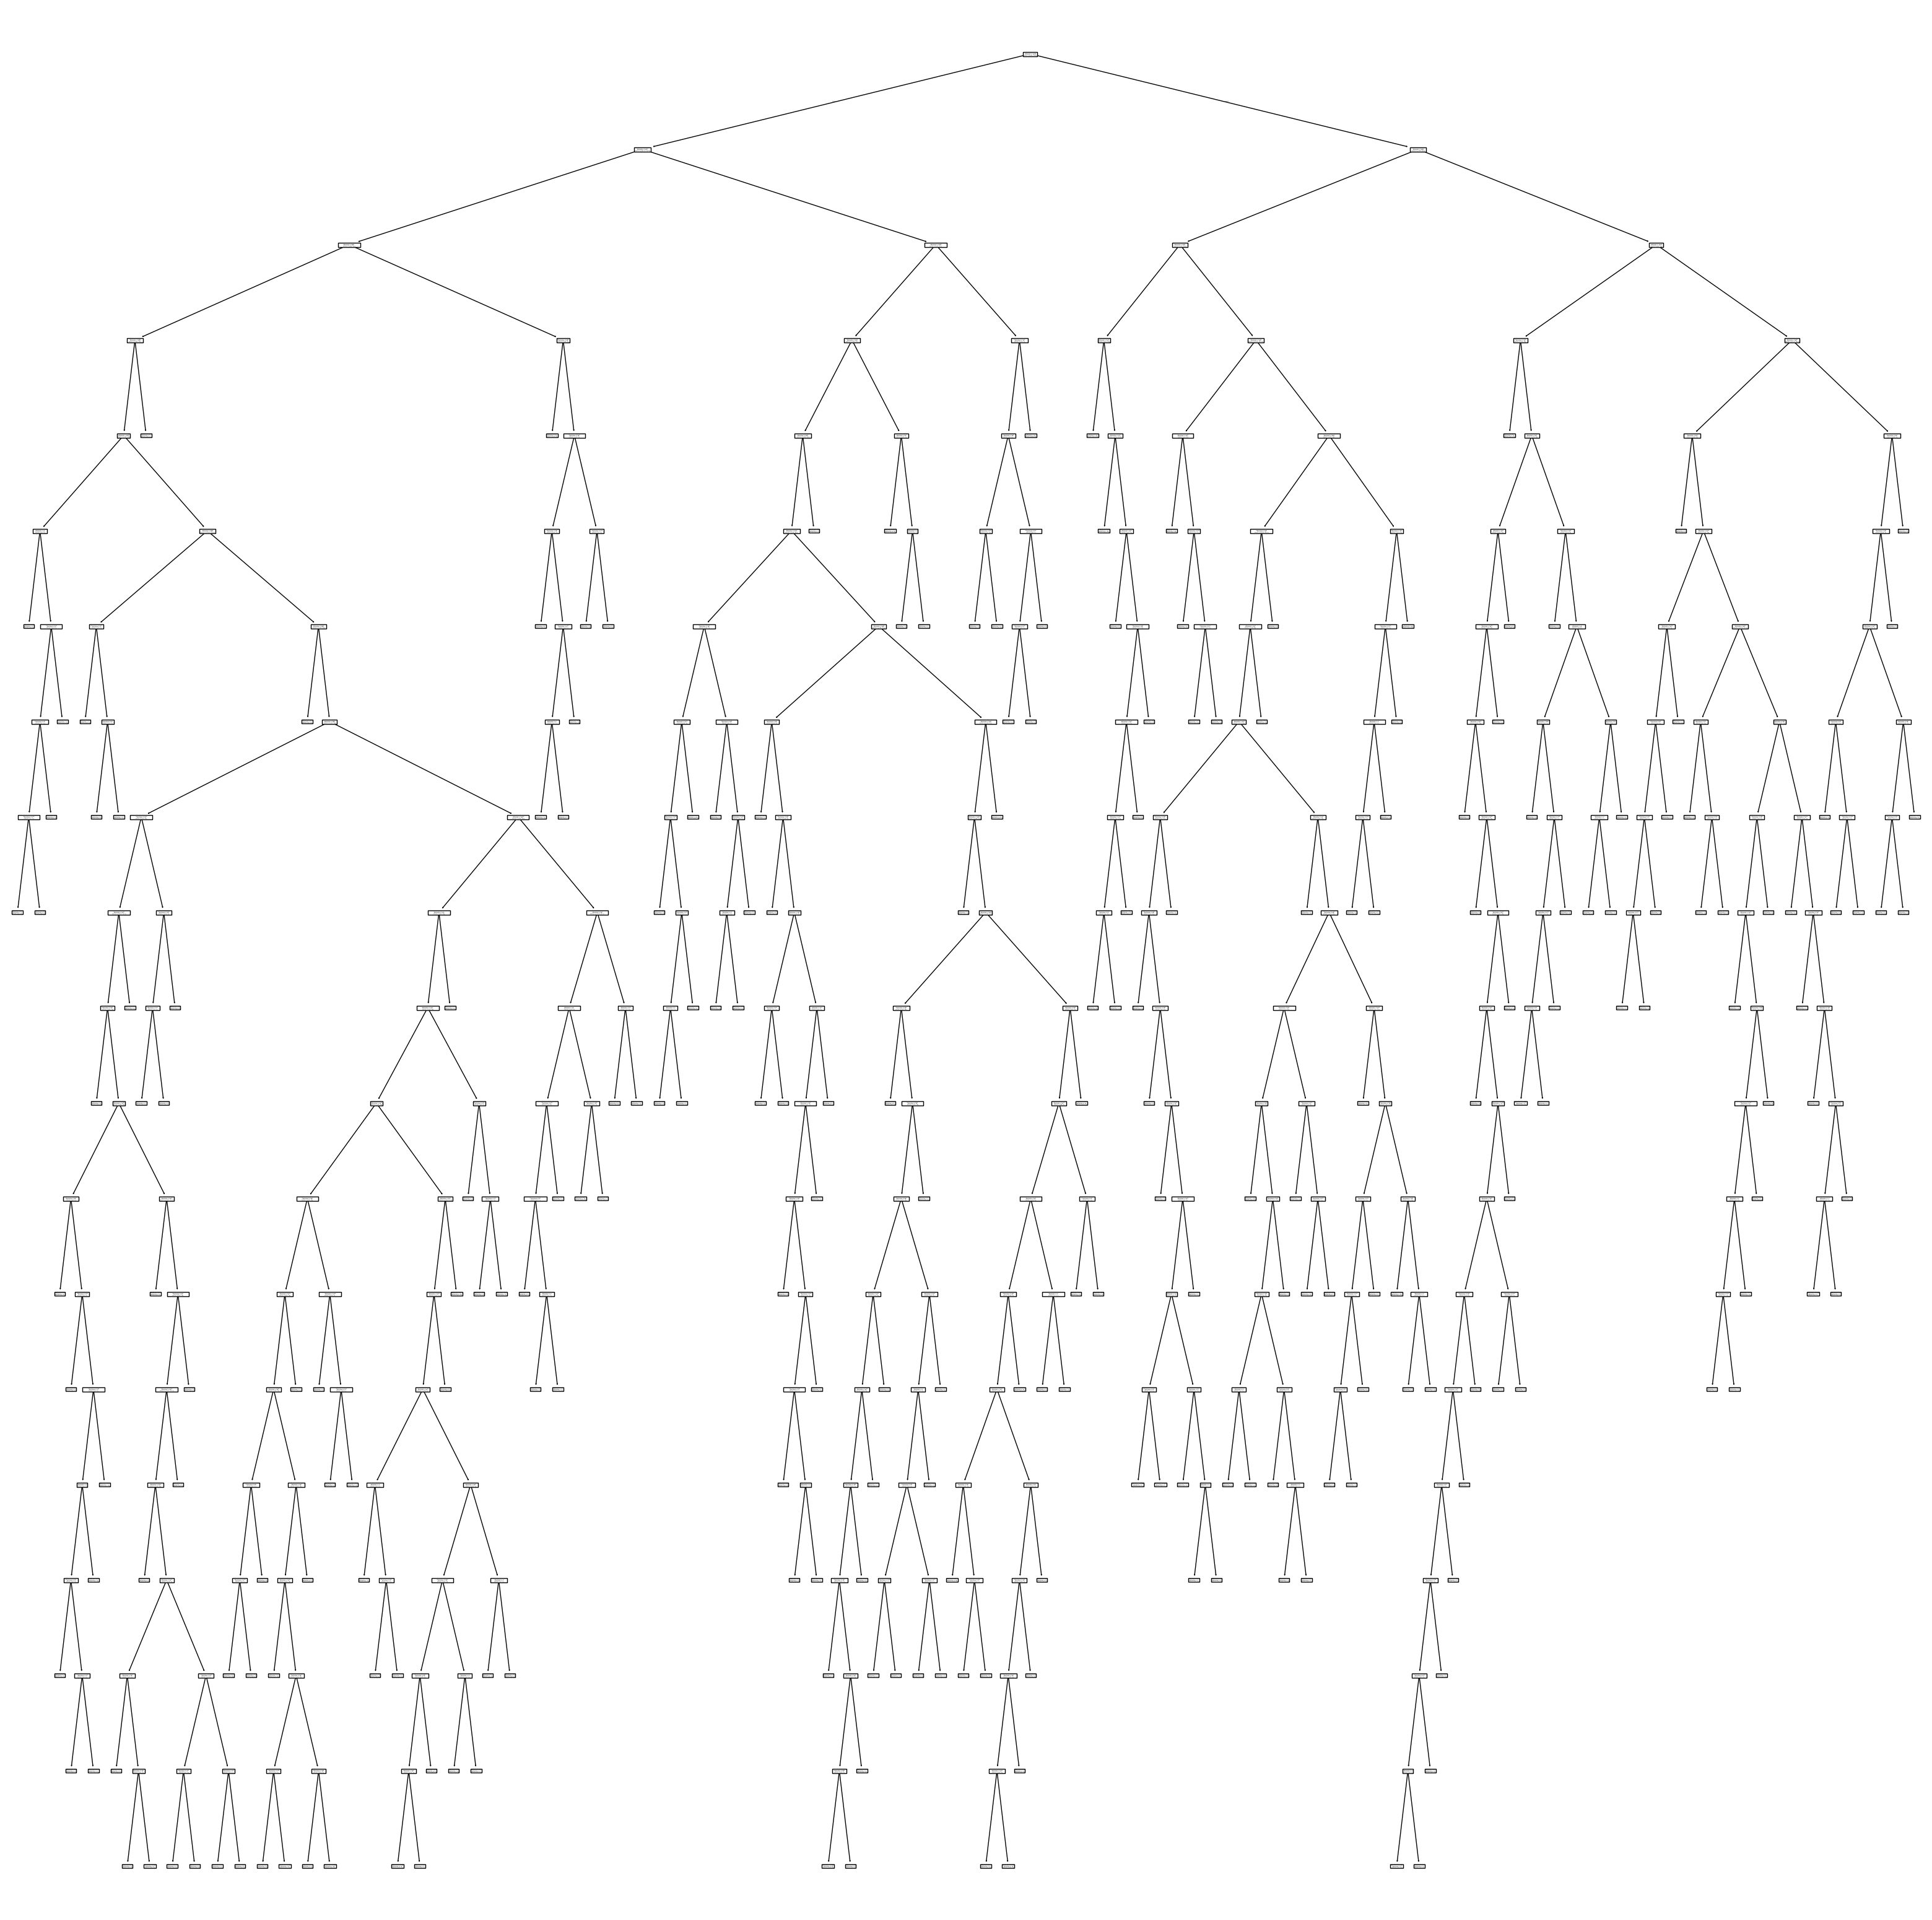

In [82]:
plt.figure(figsize=(40,40))
plot_tree(dtc, feature_names= X_train.columns)